In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import scipy.interpolate as spi
import math
import matplotlib.figure as fig
from scipy import stats

In [157]:
data1 = pd.read_csv("../FilesEj3/OutputEj3_1.csv")
data2 = pd.read_csv("../FilesEj3/OutputEj3_2.csv")
data3 = pd.read_csv("../FilesEj3/OutputEj3_3.csv")
data4 = pd.read_csv("../FilesEj3/OutputEj3_4.csv")


In [158]:
data1_4 = pd.read_csv("../FilesEj4/OutputEj4_1.csv")
data2_4 = pd.read_csv("../FilesEj4/OutputEj4_2.csv")
data3_4 = pd.read_csv("../FilesEj4/OutputEj4_3.csv")


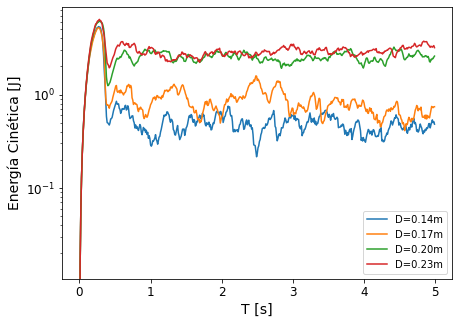

In [159]:
parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(7,5))
plt.plot(data1['Dt'], data1['KE'], label = "D=0.14m")
plt.plot(data2['Dt'], data2['KE'], label = "D=0.17m")
plt.plot(data3['Dt'], data3['KE'], label = "D=0.20m")
plt.plot(data4['Dt'], data4['KE'], label = "D=0.23m")
plt.xlabel("T [s]")
plt.ylabel("Energía Cinética [J]")
plt.semilogy()
plt.legend()

In [160]:
def getIndex(array_t, array_n, t_equil):
    i = 0
    while i < len(array_t):
        if array_t[i] > t_equil:
            return array_n[i:-1:1]
        i+=1
    

In [161]:
# index = 0
# while data1_4['Dt'][index]<10:
#     index+=1
# d1 = data1_4['Dt'][0:index:1]
# d2 = data1_4['KE'][0:index:1]
# plt.plot(d1,d2)
# plt.semilogy()


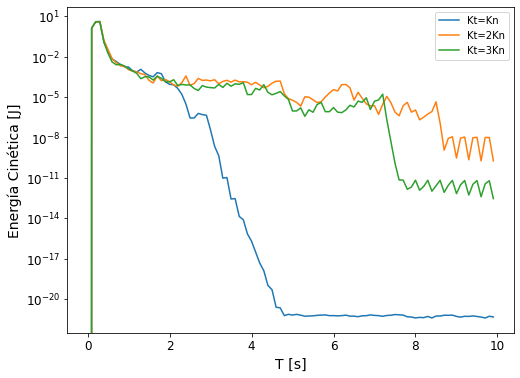

In [162]:
parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(8,6))
plt.plot(data1_4['Dt'], data1_4['KE'], label = "Kt=Kn")
# plt.plot(d1, d2, label = "Kt=Kn")
plt.plot(data2_4['Dt'], data2_4['KE'], label = "Kt=2Kn")
plt.plot(data3_4['Dt'], data3_4['KE'], label = "Kt=3Kn")
plt.xlabel("T [s]")
plt.ylabel("Energía Cinética [J]")
plt.semilogy()
plt.legend()

In [163]:
time_equilibrio_kn = 1
time_equilibrio_2kn = 4
time_equilibrio_3kn = 5

In [164]:
def get_values(array):
    prom = array.mean()
    sum = 0
    for i in array:
        sum += (i-prom)**2
    ret = math.sqrt(sum/len(array))
    return prom, ret

In [165]:
values_kt1 = getIndex(data1_4['Dt'], data1_4['KE'], time_equilibrio_kn)
values_kt2 = getIndex(data2_4['Dt'], data2_4['KE'], time_equilibrio_2kn)
values_kt3 = getIndex(data3_4['Dt'], data3_4['KE'], time_equilibrio_3kn)
p1, d1 = get_values(values_kt1)
p2, d2 = get_values(values_kt2)
p3, d3 = get_values(values_kt3)

[0.00020467710860297756, 3.7801728475915305e-05, 2.8921197465255235e-06]


Text(0, 0.5, 'Energía Cinética [J]')

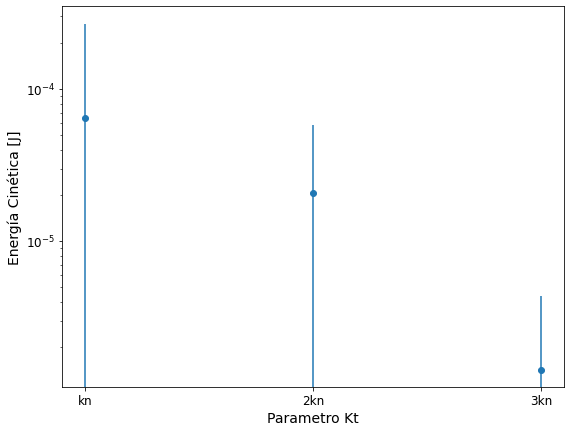

In [166]:
array_x = ["kn", "2kn", "3kn"]
array_y = [p1, p2, p3]
y_errs = [d1, d2, d3]
print(y_errs)
parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(9,7))
plt.errorbar(array_x, array_y, yerr=np.array(y_errs), fmt="o")
plt.xlabel("Parametro Kt")
plt.semilogy()
# plt.ylim(10**-13, 10**-1)
plt.ylabel("Energía Cinética [J]")